In [1]:
import numpy as np 
import pandas as pd
from matplotlib import cm as cm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

df=pd.read_csv("final.csv")
dataset=df[df.STATE=='GUJARAT']
AT=dataset['AvgTemp']
Prep=dataset['Precipitation']
PE=dataset['PotentialEvapTran']
VP=dataset['VapourPres']
WDf=dataset['WetDayFreq']

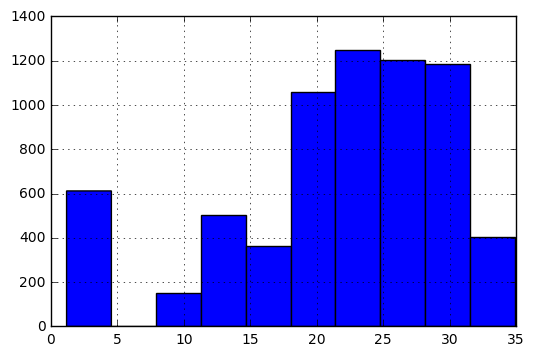

In [2]:
AT.hist()
plt.show()

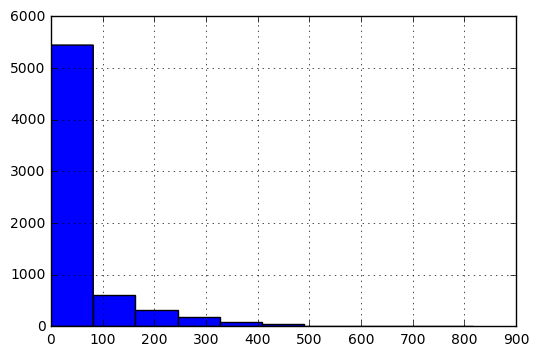

In [3]:
Prep.hist()
plt.show()

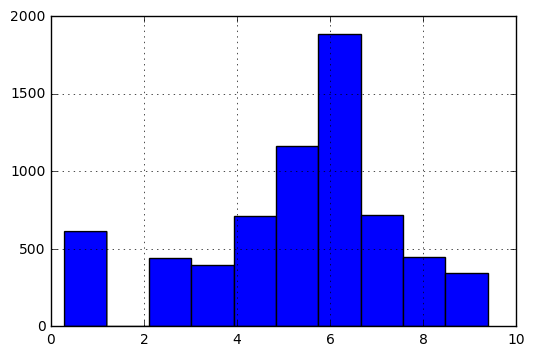

In [4]:
PE.hist()
plt.show()

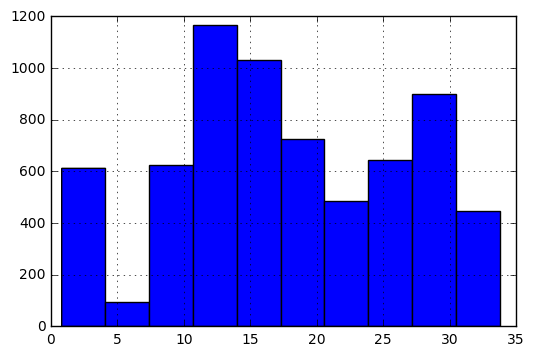

In [5]:
VP.hist()
plt.show()

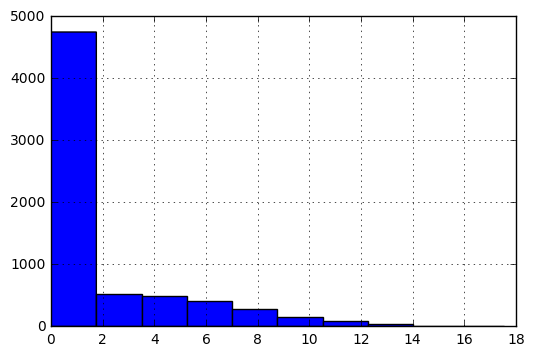

In [6]:
WDf.hist()
plt.show()

In [7]:
corr=dataset.corr(method='pearson')
print(corr)

                    AvgTemp      YEAR  PotentialEvapTran  Precipitation  \
AvgTemp            1.000000  0.014519           0.921000       0.247768   
YEAR               0.014519  1.000000          -0.001052      -0.026810   
PotentialEvapTran  0.921000 -0.001052           1.000000      -0.010853   
Precipitation      0.247768 -0.026810          -0.010853       1.000000   
SPI               -0.021859 -0.092268          -0.007199       0.254871   
VapourPres         0.854462  0.010801           0.616323       0.514074   
WetDayFreq         0.285738 -0.016641          -0.025820       0.921657   
CLASS              0.014809  0.051228          -0.001997      -0.091455   

                        SPI  VapourPres  WetDayFreq     CLASS  
AvgTemp           -0.021859    0.854462    0.285738  0.014809  
YEAR              -0.092268    0.010801   -0.016641  0.051228  
PotentialEvapTran -0.007199    0.616323   -0.025820 -0.001997  
Precipitation      0.254871    0.514074    0.921657 -0.091455  
SPI 

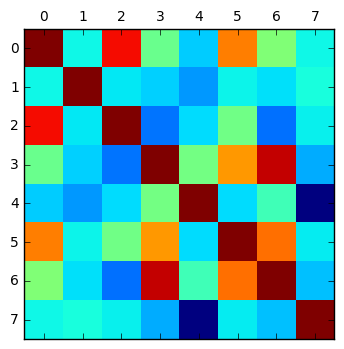

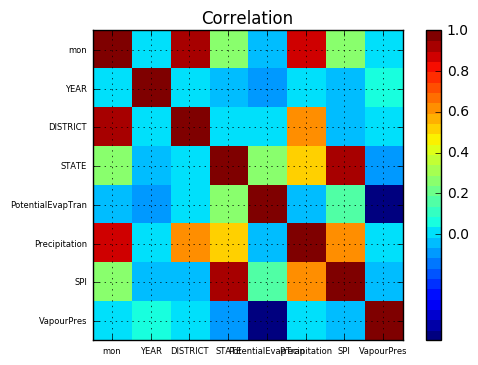

In [8]:
plt.matshow(df.corr())
plt.show()
"""names=['AvgTemp', 'mon', 'YEAR', 'DISTRICT', 'STATE', 'PotentialEvapTran',
       'Precipitation', 'SPI', 'VapourPres', 'WetDayFreq', 'CLASS']
fig=plt.figure()
ax=fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()
"""
def correlation_matrix(df):
    
    

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Correlation')
    labels=['AvgTemp', 'mon', 'YEAR', 'DISTRICT', 'STATE', 'PotentialEvapTran',
       'Precipitation', 'SPI', 'VapourPres', 'WetDayFreq', 'CLASS']
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.0,.2,.4,.6,.8,1])
    plt.show()

correlation_matrix(dataset)

In [9]:

X=dataset.iloc[:,[0,1,3,4,5,6,8,9]].values
Y=dataset.iloc[:,10].values
labelen1=LabelEncoder()
labelen2=LabelEncoder()
labelen3=LabelEncoder()

X[:,1]=labelen1.fit_transform(X[:,1])
X[:,2]=labelen2.fit_transform(X[:,2])
X[:,3]=labelen3.fit_transform(X[:,3])

In [10]:
X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2,random_state=0)

In [11]:
classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)
acc=classifier.score(X_test,y_test)
print(classifier.score(X_test,y_test))

0.88864142539


In [12]:
#excluding now avg temp 
X=dataset.iloc[:,[1,3,4,5,6,8,9]].values
Y=dataset.iloc[:,10].values

labelen1=LabelEncoder()
labelen2=LabelEncoder()
labelen3=LabelEncoder()

X[:,0]=labelen1.fit_transform(X[:,0])
X[:,1]=labelen2.fit_transform(X[:,1])
X[:,2]=labelen3.fit_transform(X[:,2])
#X[:,4]=labelencoder_X.fit_transform(X[:,4])


X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2,random_state=0)

classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)
print(acc)
print(classifier.score(X_test,y_test))
print(((classifier.score(X_test,y_test)-acc)/acc)*100)


0.88864142539
0.898292501856
1.08604845447


In [13]:
#excluding PE
X=dataset.iloc[:,[0,1,3,4,6,8,9]].values
Y=dataset.iloc[:,10].values

labelen1=LabelEncoder()
labelen2=LabelEncoder()
labelen3=LabelEncoder()

X[:,1]=labelen1.fit_transform(X[:,1])
X[:,2]=labelen2.fit_transform(X[:,2])
X[:,3]=labelen3.fit_transform(X[:,3])
#X[:,4]=labelencoder_X.fit_transform(X[:,4])


X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2,random_state=0)

classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

print(acc)
print(classifier.score(X_test,y_test))
print(((classifier.score(X_test,y_test)-acc)/acc)*100)


0.88864142539
0.886414253898
-0.250626566416


In [14]:
#excluding Precipitation
X=dataset.iloc[:,[0,1,3,4,5,8,9]].values
Y=dataset.iloc[:,10].values

labelen1=LabelEncoder()
labelen2=LabelEncoder()
labelen3=LabelEncoder()

X[:,1]=labelen1.fit_transform(X[:,1])
X[:,2]=labelen2.fit_transform(X[:,2])
X[:,3]=labelen3.fit_transform(X[:,3])
#X[:,4]=labelencoder_X.fit_transform(X[:,4])


X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2,random_state=0)

classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)
print(acc)
print(classifier.score(X_test,y_test))
print(((classifier.score(X_test,y_test)-acc)/acc)*100)

0.88864142539
0.896065330364
0.835421888053


In [15]:
#excluding VP
X=dataset.iloc[:,[0,1,3,4,5,6,9]].values
Y=dataset.iloc[:,10].values

labelen1=LabelEncoder()
labelen2=LabelEncoder()
labelen3=LabelEncoder()

X[:,1]=labelen1.fit_transform(X[:,1])
X[:,2]=labelen2.fit_transform(X[:,2])
X[:,3]=labelen3.fit_transform(X[:,3])
#X[:,4]=labelencoder_X.fit_transform(X[:,4])


X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2,random_state=0)

classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

print(acc)
print(classifier.score(X_test,y_test))
print(((classifier.score(X_test,y_test)-acc)/acc)*100)

0.88864142539
0.887899034892
-0.0835421888053


In [16]:
#excluding WD
X=dataset.iloc[:,[0,1,3,4,5,6,8]].values
Y=dataset.iloc[:,10].values

labelen1=LabelEncoder()
labelen2=LabelEncoder()
labelen3=LabelEncoder()

X[:,1]=labelen1.fit_transform(X[:,1])
X[:,2]=labelen2.fit_transform(X[:,2])
X[:,3]=labelen3.fit_transform(X[:,3])
#X[:,4]=labelencoder_X.fit_transform(X[:,4])


X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2,random_state=0)

classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

print(acc)
print(classifier.score(X_test,y_test))
print(((classifier.score(X_test,y_test)-acc)/acc)*100)

0.88864142539
0.889383815887
0.0835421888053


In [17]:
#single featured: avg temp
X=dataset.iloc[:,[0]].values
Y=dataset.iloc[:,10].values

"""labelen1=LabelEncoder()
labelen2=LabelEncoder()
labelen3=LabelEncoder()

X[:,1]=labelen1.fit_transform(X[:,1])
X[:,2]=labelen2.fit_transform(X[:,2])
X[:,3]=labelen3.fit_transform(X[:,3])
#X[:,4]=labelencoder_X.fit_transform(X[:,4])
"""


X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2,random_state=0)

classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

print(acc)
print(classifier.score(X_test,y_test))
print(((classifier.score(X_test,y_test)-acc)/acc)*100)

0.88864142539
0.889383815887
0.0835421888053


In [18]:
#single featured: PE
X=dataset.iloc[:,[5]].values
Y=dataset.iloc[:,10].values

"""labelen1=LabelEncoder()
labelen2=LabelEncoder()
labelen3=LabelEncoder()

X[:,0]=labelen1.fit_transform(X[:,0])
X[:,1]=labelen2.fit_transform(X[:,1])
X[:,2]=labelen3.fit_transform(X[:,2])
#X[:,4]=labelencoder_X.fit_transform(X[:,4])
"""


X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2,random_state=0)

classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

print(acc)
print(classifier.score(X_test,y_test))
print(((classifier.score(X_test,y_test)-acc)/acc)*100)

0.88864142539
0.926503340757
4.26065162907


In [19]:
#single featured: Precipitation
X=dataset.iloc[:,[6]].values
Y=dataset.iloc[:,10].values

"""labelen1=LabelEncoder()
labelen2=LabelEncoder()
labelen3=LabelEncoder()

X[:,0]=labelen1.fit_transform(X[:,0])
X[:,1]=labelen2.fit_transform(X[:,1])
X[:,2]=labelen3.fit_transform(X[:,2])
#X[:,4]=labelencoder_X.fit_transform(X[:,4])
"""


X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2,random_state=0)

classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

print(acc)
print(classifier.score(X_test,y_test))
print(((classifier.score(X_test,y_test)-acc)/acc)*100)


0.88864142539
0.891610987379
0.334168755221


In [20]:
#single featured: VP
X=dataset.iloc[:,[8]].values
Y=dataset.iloc[:,10].values

"""labelen1=LabelEncoder()
labelen2=LabelEncoder()
labelen3=LabelEncoder()

X[:,0]=labelen1.fit_transform(X[:,0])
X[:,1]=labelen2.fit_transform(X[:,1])
X[:,2]=labelen3.fit_transform(X[:,2])
#X[:,4]=labelencoder_X.fit_transform(X[:,4])
"""


X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2,random_state=0)

classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

print(acc)
print(classifier.score(X_test,y_test))
print(((classifier.score(X_test,y_test)-acc)/acc)*100)


0.88864142539
0.90571640683
1.92147034252


In [21]:
#single featured: WDF
X=dataset.iloc[:,[9]].values
Y=dataset.iloc[:,10].values

"""labelen1=LabelEncoder()
labelen2=LabelEncoder()
labelen3=LabelEncoder()


X[:,0]=labelen1.fit_transform(X[:,0])
X[:,1]=labelen2.fit_transform(X[:,1])
X[:,2]=labelen3.fit_transform(X[:,2])
#X[:,4]=labelencoder_X.fit_transform(X[:,4])
"""


X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2,random_state=0)

classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

print(acc)
print(classifier.score(X_test,y_test))
print(((classifier.score(X_test,y_test)-acc)/acc)*100)



0.88864142539
0.904231625835
1.75438596491
